In [1]:
#Mounting Drive:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
#Importing Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Loading Dataset:
df = pd.read_csv("/content/drive/MyDrive/ratings_and_prices.csv")

In [4]:
df.head()

,City,Category,Sub-Category,Product,SKU ID,Image,Brand,SKU Name,SKU Size,MRP,Selling Price,Item Link,In Stock,Out of Stock,Rating,Price
0,NaN,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,126906,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta/Godihittu,10 kg,Rs 576,Rs 480,https://www.bigbasket.com/pd/126906/aashirvaad...,Yes,No,4.1,₹436.79
1,NaN,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,1220743,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta,Combo 2 Items,Rs 346,Rs 324.80,https://www.bigbasket.com/pd/1220743/aashirvaa...,Yes,No,3.9,₹265.34
2,NaN,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,1220742,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta,Combo 2 Items,Rs 604,Rs 503.80,https://www.bigbasket.com/pd/1220742/aashirvaa...,Yes,No,4.1,₹456.54
3,NaN,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,40236231,https://www.bigbasket.com/media/uploads/p/l/40...,Aashirvaad,Aashirvaad Select Sharbati Atta,10 kg,Rs 680,Rs 584.80,https://www.bigbasket.com/pd/40236231/aashirva...,Yes,No,4.1,₹571.2
4,NaN,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,40236230,https://www.bigbasket.com/media/uploads/p/l/40...,Aashirvaad,Aashirvaad Atta with Multigrains,10 kg,Rs 720,Rs 619.20,https://www.bigbasket.com/pd/40236230/aashirva...,Yes,No,4.1,₹546


In [5]:
df.columns

Index(['City', 'Category', 'Sub-Category', 'Product', 'SKU ID', 'Image',
       'Brand', 'SKU Name', 'SKU Size', 'MRP', 'Selling Price', 'Item Link',
       'In Stock', 'Out of Stock', 'Rating', 'Price'],
      dtype='object')

In [6]:
df.isnull().sum()

City             4988
Category            0
Sub-Category        0
Product             0
SKU ID              0
Image               0
Brand               0
SKU Name            0
SKU Size            0
MRP                 0
Selling Price       0
Item Link           0
In Stock            0
Out of Stock        0
Rating            282
Price              26
dtype: int64

In [7]:
#As we have to predict price so we need price value to check the difference between predicted value and true value
#And all the rows have the Null Value, so we can drop that column
df = df.drop(['City'], axis=1)
df.head()

,Category,Sub-Category,Product,SKU ID,Image,Brand,SKU Name,SKU Size,MRP,Selling Price,Item Link,In Stock,Out of Stock,Rating,Price
0,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,126906,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta/Godihittu,10 kg,Rs 576,Rs 480,https://www.bigbasket.com/pd/126906/aashirvaad...,Yes,No,4.1,₹436.79
1,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,1220743,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta,Combo 2 Items,Rs 346,Rs 324.80,https://www.bigbasket.com/pd/1220743/aashirvaa...,Yes,No,3.9,₹265.34
2,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,1220742,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta,Combo 2 Items,Rs 604,Rs 503.80,https://www.bigbasket.com/pd/1220742/aashirvaa...,Yes,No,4.1,₹456.54
3,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,40236231,https://www.bigbasket.com/media/uploads/p/l/40...,Aashirvaad,Aashirvaad Select Sharbati Atta,10 kg,Rs 680,Rs 584.80,https://www.bigbasket.com/pd/40236231/aashirva...,Yes,No,4.1,₹571.2
4,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,40236230,https://www.bigbasket.com/media/uploads/p/l/40...,Aashirvaad,Aashirvaad Atta with Multigrains,10 kg,Rs 720,Rs 619.20,https://www.bigbasket.com/pd/40236230/aashirva...,Yes,No,4.1,₹546


In [8]:
df.shape

(4988, 15)

In [9]:
null_rating = df['Rating'].isnull()
null_price = df['Price'].isnull()

In [10]:
if null_rating.equals(null_price):
  print("Same")
else:
  print("Not Same")

Not Same


In [11]:
df1 = df.dropna(subset=['Price', 'Rating'])
df1.head()

,Category,Sub-Category,Product,SKU ID,Image,Brand,SKU Name,SKU Size,MRP,Selling Price,Item Link,In Stock,Out of Stock,Rating,Price
0,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,126906,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta/Godihittu,10 kg,Rs 576,Rs 480,https://www.bigbasket.com/pd/126906/aashirvaad...,Yes,No,4.1,₹436.79
1,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,1220743,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta,Combo 2 Items,Rs 346,Rs 324.80,https://www.bigbasket.com/pd/1220743/aashirvaa...,Yes,No,3.9,₹265.34
2,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,1220742,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta,Combo 2 Items,Rs 604,Rs 503.80,https://www.bigbasket.com/pd/1220742/aashirvaa...,Yes,No,4.1,₹456.54
3,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,40236231,https://www.bigbasket.com/media/uploads/p/l/40...,Aashirvaad,Aashirvaad Select Sharbati Atta,10 kg,Rs 680,Rs 584.80,https://www.bigbasket.com/pd/40236231/aashirva...,Yes,No,4.1,₹571.2
4,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,40236230,https://www.bigbasket.com/media/uploads/p/l/40...,Aashirvaad,Aashirvaad Atta with Multigrains,10 kg,Rs 720,Rs 619.20,https://www.bigbasket.com/pd/40236230/aashirva...,Yes,No,4.1,₹546


In [12]:
df1.shape

(4690, 15)

In [13]:
4988 - 4690

298

In [14]:
298-282

16

In [15]:
df1.columns

Index(['Category', 'Sub-Category', 'Product', 'SKU ID', 'Image', 'Brand',
       'SKU Name', 'SKU Size', 'MRP', 'Selling Price', 'Item Link', 'In Stock',
       'Out of Stock', 'Rating', 'Price'],
      dtype='object')

In [16]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.8 MB/s eta 0:00:00


In [17]:
#Importing Libraries:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import streamlit as st
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df1.describe()

,SKU ID,Rating
count,4.690000e+03,4690.000000
mean,2.570026e+07,3.961535
std,2.103861e+07,0.509421
min,1.337900e+04,1.000000
25%,1.214119e+06,3.900000
50%,4.004284e+07,4.100000
75%,4.018854e+07,4.200000
max,1.006472e+08,5.000000


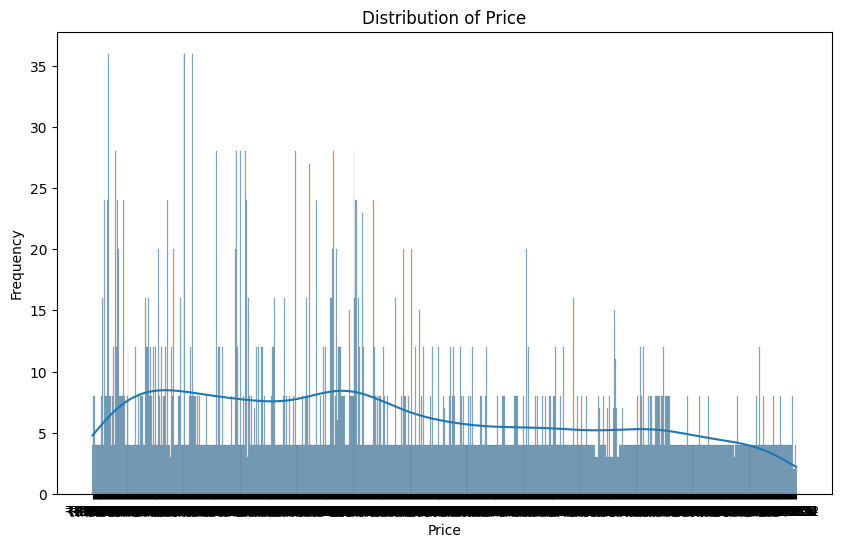

In [19]:
#Distribution of numerical variables
plt.figure(figsize=(10, 6))
sns.histplot(df1['Price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

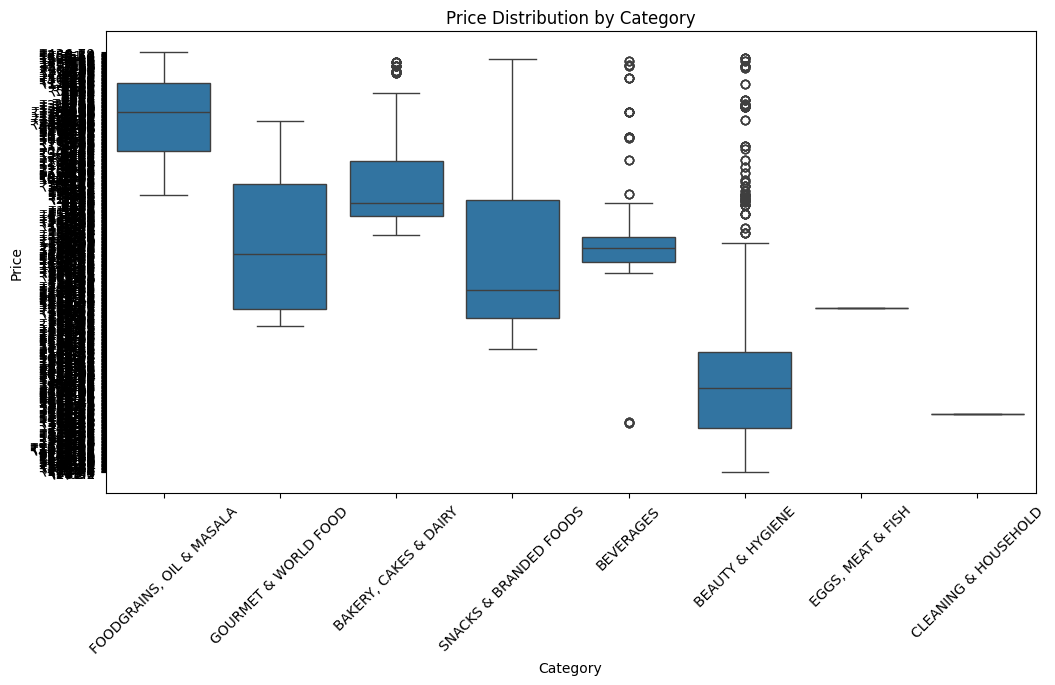

In [20]:
#Boxplot of Price by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=df1)
plt.title('Price Distribution by Category')
plt.xticks(rotation=45)
plt.show()

<ipython-input-21-d2b43d858660>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


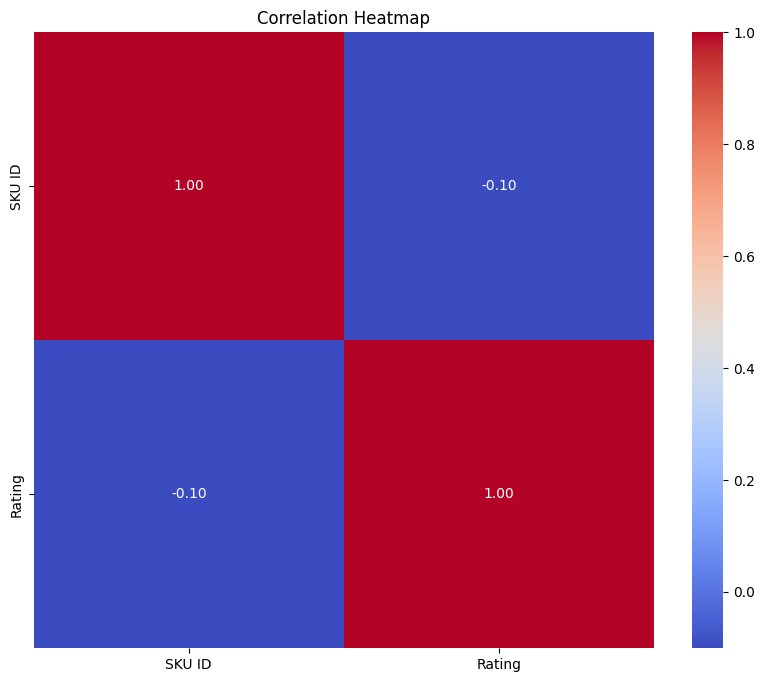

In [21]:
#Correlation heatmap of numerical variables
correlation_matrix = df1.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

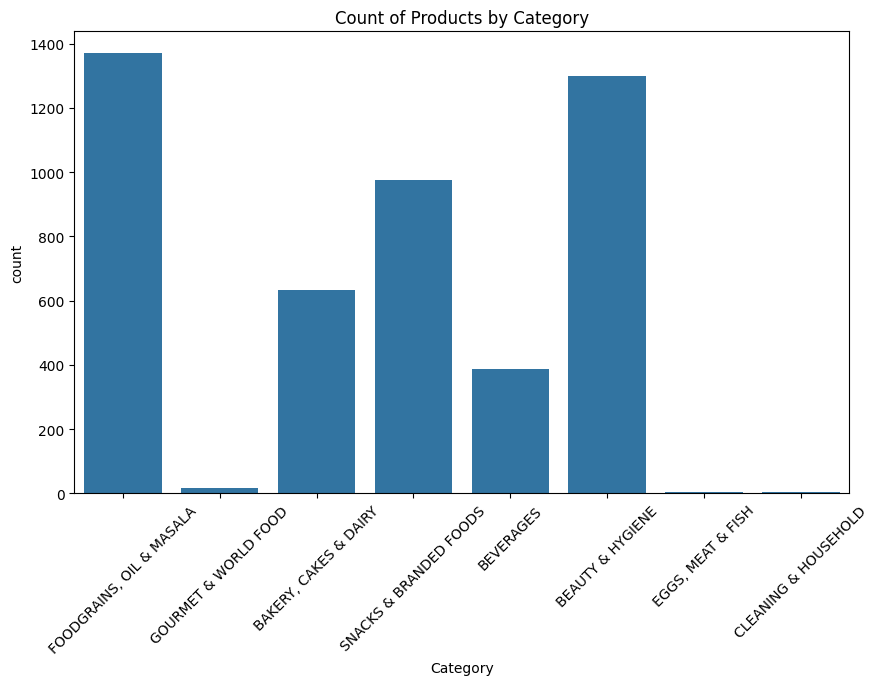

In [22]:
#Count plot of categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=df1)
plt.title('Count of Products by Category')
plt.xticks(rotation=45)
plt.show()

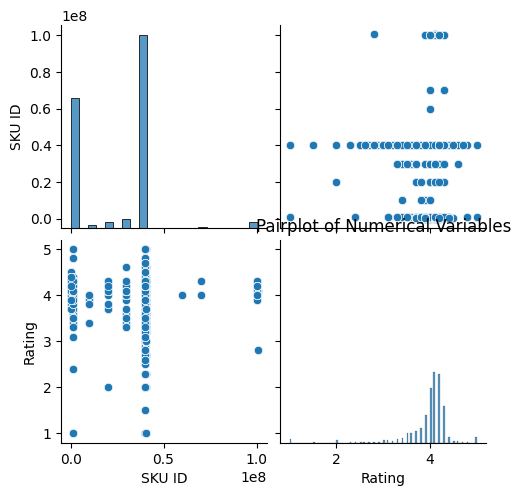

In [23]:
# Pairplot for numerical variables
sns.pairplot(df1)
plt.title('Pairplot of Numerical Variables')
plt.show()

In [24]:
# # Barplot of average Price by Sub-Category
# average_price_by_subcategory = df1.groupby('Sub-Category')['Price'].mean().reset_index()
# plt.figure(figsize=(12, 6))
# # sns.barplot(x='Sub-Category', y='Price', data=average_price_by_subcategory)
# plt.title('Average Price by Sub-Category')
# plt.xticks(rotation=45)
# plt.show()

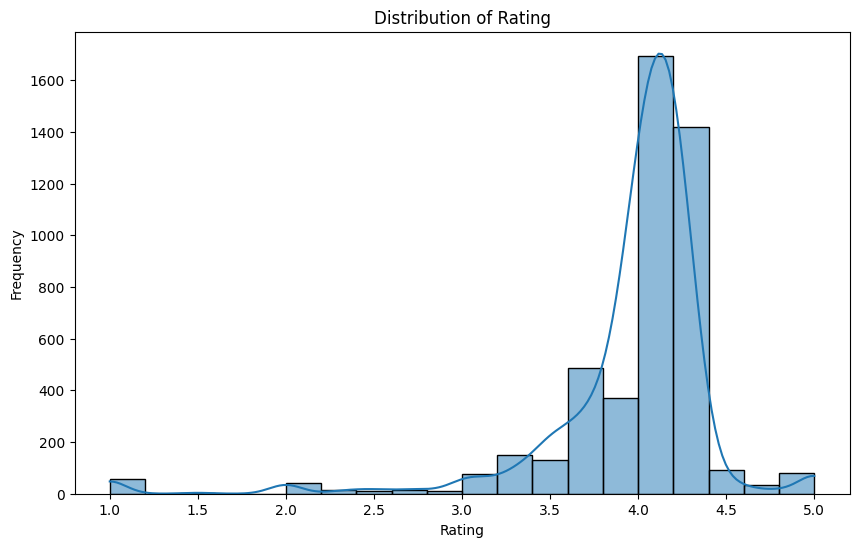

In [25]:
# Distribution of Rating
plt.figure(figsize=(10, 6))
sns.histplot(df1['Rating'], bins=20, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

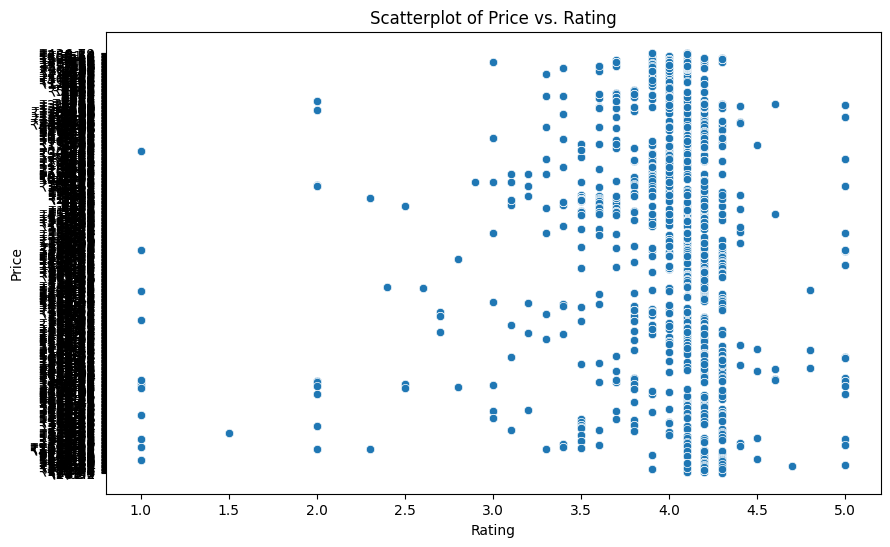

In [26]:
# Scatterplot of Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Price', data=df1)
plt.title('Scatterplot of Price vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

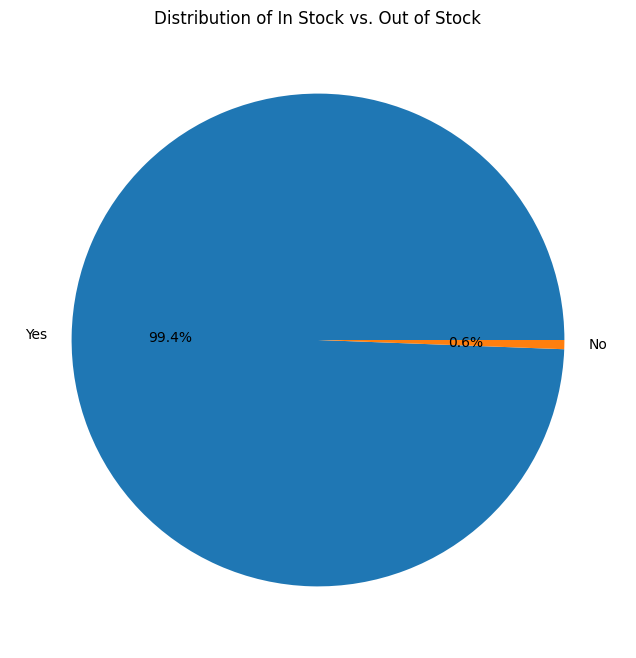

In [27]:
# Pie chart of the distribution of In Stock vs. Out of Stock
plt.figure(figsize=(8, 8))
df1['In Stock'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of In Stock vs. Out of Stock')
plt.ylabel('')
plt.show()

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical variables using LabelEncoder
df1['Category_encoded'] = label_encoder.fit_transform(df1['Category'])
df1['Sub-Category_encoded'] = label_encoder.fit_transform(df1['Sub-Category'])
df1['Brand_encoded'] = label_encoder.fit_transform(df1['Brand'])

# Display the DataFrame with encoded categorical variables
df1.head()

<ipython-input-28-bb156ba3b8dd>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Category_encoded'] = label_encoder.fit_transform(df1['Category'])
<ipython-input-28-bb156ba3b8dd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Sub-Category_encoded'] = label_encoder.fit_transform(df1['Sub-Category'])
<ipython-input-28-bb156ba3b8dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

,Category,Sub-Category,Product,SKU ID,Image,Brand,SKU Name,SKU Size,MRP,Selling Price,Item Link,In Stock,Out of Stock,Rating,Price,Category_encoded,Sub-Category_encoded,Brand_encoded
0,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,126906,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta/Godihittu,10 kg,Rs 576,Rs 480,https://www.bigbasket.com/pd/126906/aashirvaad...,Yes,No,4.1,₹436.79,5,1,6
1,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,1220743,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta,Combo 2 Items,Rs 346,Rs 324.80,https://www.bigbasket.com/pd/1220743/aashirvaa...,Yes,No,3.9,₹265.34,5,1,6
2,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,1220742,https://www.bigbasket.com/media/uploads/p/l/12...,Aashirvaad,Aashirvaad Atta,Combo 2 Items,Rs 604,Rs 503.80,https://www.bigbasket.com/pd/1220742/aashirvaa...,Yes,No,4.1,₹456.54,5,1,6
3,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,40236231,https://www.bigbasket.com/media/uploads/p/l/40...,Aashirvaad,Aashirvaad Select Sharbati Atta,10 kg,Rs 680,Rs 584.80,https://www.bigbasket.com/pd/40236231/aashirva...,Yes,No,4.1,₹571.2,5,1,6
4,"FOODGRAINS, OIL & MASALA","ATTA, FLOURS & SOOJI",ATTA WHOLE WHEAT,40236230,https://www.bigbasket.com/media/uploads/p/l/40...,Aashirvaad,Aashirvaad Atta with Multigrains,10 kg,Rs 720,Rs 619.20,https://www.bigbasket.com/pd/40236230/aashirva...,Yes,No,4.1,₹546,5,1,6


In [29]:
df1.columns

Index(['Category', 'Sub-Category', 'Product', 'SKU ID', 'Image', 'Brand',
       'SKU Name', 'SKU Size', 'MRP', 'Selling Price', 'Item Link', 'In Stock',
       'Out of Stock', 'Rating', 'Price', 'Category_encoded',
       'Sub-Category_encoded', 'Brand_encoded'],
      dtype='object')

In [32]:
# Remove unnecessary columns
df1.drop(columns=['Category', 'Sub-Category', 'Brand', 'Item Link', 'Out of Stock', 'Image'], axis=1,inplace=True)

KeyError: "['Category', 'Sub-Category', 'Brand', 'Item Link', 'Out of Stock', 'Image'] not found in axis"

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load your DataFrame
# Assuming 'data' is your DataFrame
data = df1

# Remove unnecessary columns
data.drop(columns=['Category', 'Sub-Category', 'Brand', 'Item Link', 'Out of Stock', 'Image'], axis=1,inplace=True)

# Preprocess text columns using word embeddings
text_columns = ['SKU Name', 'SKU Size', 'In Stock']

# Combine text columns into a single column
data['text_combined'] = data[text_columns].apply(lambda x: ' '.join(x), axis=1)

# Tokenize text
max_words = 10000  # Maximum number of words to keep
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data['text_combined'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['text_combined'])

# Pad sequences to have consistent length
max_sequence_length = 100  # Maximum sequence length
X_text = pad_sequences(sequences, maxlen=max_sequence_length)

# Split the data into features (X) and target variable (y)
X_numeric = data.drop(columns=['Price'])
y = data['Price']

# Split the data into training and testing sets
X_text_train, X_text_test, X_numeric_train, X_numeric_test, y_train, y_test = train_test_split(X_text, X_numeric, y, test_size=0.2, random_state=42)

# Define and train Random Forest Regression model for numeric features
rf_model_numeric = RandomForestRegressor()
rf_model_numeric.fit(X_numeric_train, y_train)

# Make predictions on the test set for numeric features
y_pred_rf_numeric = rf_model_numeric.predict(X_numeric_test)

# Evaluate the Random Forest model's performance for numeric features
mae_rf_numeric = mean_absolute_error(y_test, y_pred_rf_numeric)
print("Mean Absolute Error (Random Forest) - Numeric Features:", mae_rf_numeric)

# Train a Neural Network Regression model for text features
model_text = keras.Sequential([
    layers.Embedding(input_dim=max_words, output_dim=100, input_length=max_sequence_length),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model_text.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model_text.fit(X_text_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set for text features
test_loss_text, test_mae_text = model_text.evaluate(X_text_test, y_test)
print("Mean Absolute Error (Neural Network) - Text Features:", test_mae_text)

<ipython-input-30-e65f0836d352>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Category', 'Sub-Category', 'Brand', 'Item Link', 'Out of Stock', 'Image'], axis=1,inplace=True)
<ipython-input-30-e65f0836d352>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text_combined'] = data[text_columns].apply(lambda x: ' '.join(x), axis=1)


ValueError: could not convert string to float: 'CASHEWS'